# Использование модели

Теперь мы используем в работе нашу натренированную модель.

In [35]:
import os
import cv2
import matplotlib.pyplot as plt

from detectron2 import model_zoo
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

%matplotlib inline

In [2]:
PATH_TO_MODEL = "../data/model_final.pth"

In [3]:
cfg = get_cfg()

cfg.MODEL.DEVICE='cpu'

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = PATH_TO_MODEL
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

predictor = DefaultPredictor(cfg)


Загрузим фото стыка, и построим визуализацию модели на нем

In [4]:
im = cv2.imread("../data/RZHD_data/JPEGImages/10040.jpg")

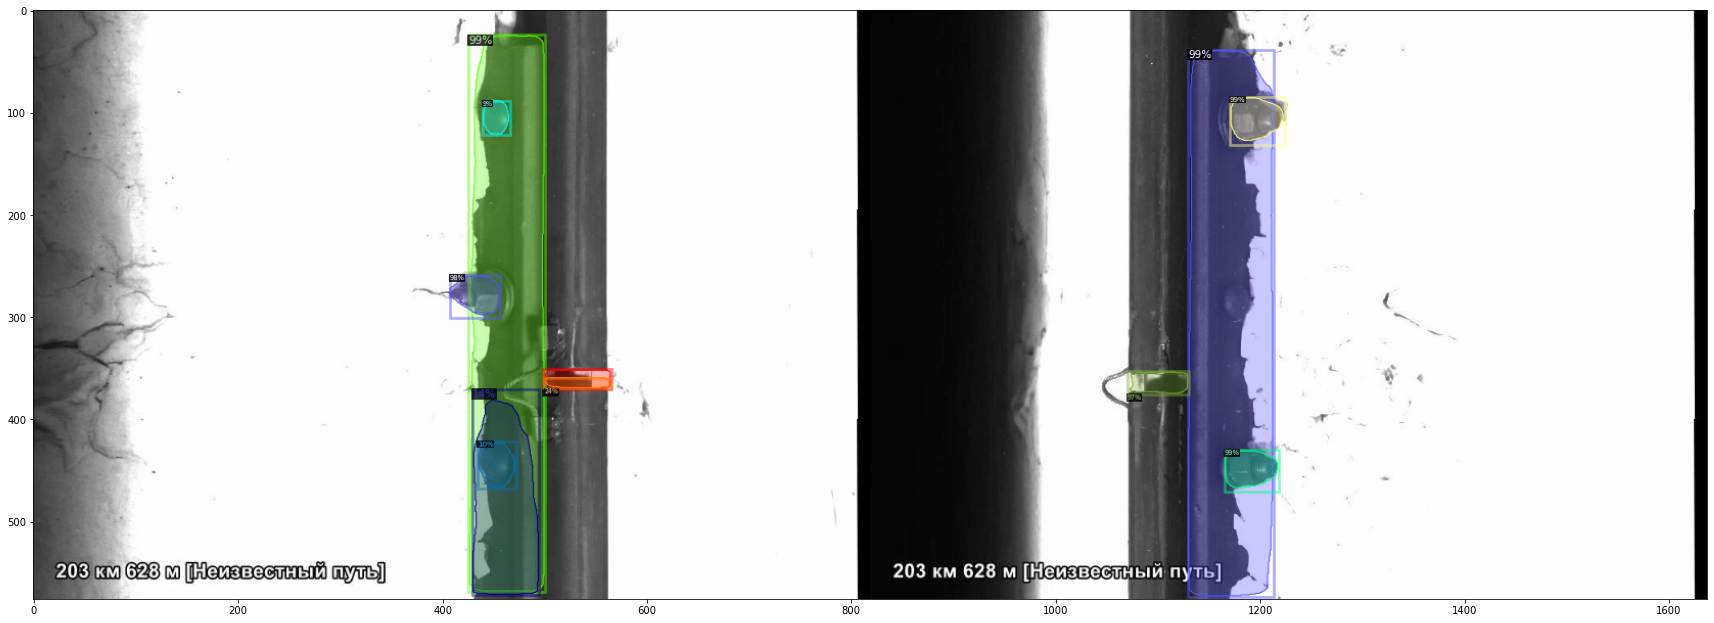

Wall time: 6.31 s


In [37]:
%%time
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
               scale=0.8, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (30, 20))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()
